<a href="https://colab.research.google.com/github/omh2021/Parking-Lot-Object-Detection/blob/main/Yolo_Parking_Space_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO Object Detection Model for Parking Space Detection
Team members: Jeremy Alexander, Omar Hussain, Jesse Incoom, and Kasra Abdi


Remove sample data

In [ ]:
!rm -rf sample_data

Install dependencies

In [ ]:
!pip install -q -U albumentations
!pip install -q ultralytics

Import dependencies

In [ ]:
from IPython.display import Image
from google.colab import files
from ultralytics import YOLO
import os
import locale

Upload a pre-trained model if desired. If a pre-trained model is not uploaded, it is assumed that a model will be trained, and the PKLot dataset will be downloaded and unzipped.

In [ ]:
uploaded_model = files.upload()

model_was_uploaded = None
uploaded_model_name = None

if len(uploaded_model) == 0:
  model_was_uploaded = False
  !mkdir dataset; cd dataset; curl -L -o PKLotDataset.zip "https://public.roboflow.com/ds/WJyyhhRI5m?key=DZ4VD4J55b"; unzip -qq PKLotDataset.zip; rm PKLotDataset.zip
else:
  model_was_uploaded = True
  uploaded_model_name = "model.pt"
  os.rename(list(uploaded_model)[0], uploaded_model_name)

Upload images to be tested against the model if desired

In [ ]:
images_were_uploaded = None
uploaded_image_names = None
uploaded_image_names_with_extension = None
uploaded_image_directory_name = None

uploaded_images = files.upload()

if len(uploaded_images) == 0:
  images_were_uploaded = False
else:
  images_were_uploaded = True

  uploaded_image_directory_name = "uploaded_images"

  os.makedirs(uploaded_image_directory_name)

  uploaded_image_names = []
  uploaded_image_names_with_extension = []

  for index, file_name in enumerate(uploaded_images.keys()):
    new_image_name = f"image{index}"
    new_image_name_with_extension = f"{new_image_name}{os.path.splitext(file_name)[1]}".lower()

    os.rename(file_name, f"{uploaded_image_directory_name}/{new_image_name_with_extension}")

    uploaded_image_names.append(new_image_name)
    uploaded_image_names_with_extension.append(new_image_name_with_extension)

Create an instance of YOLO. If no pre-trained model was uploaded, train an empty model using the dataset.

In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"

model = None
project_name = "results"
task_name = "detect"
data_path = "/content/dataset/data.yaml"
model_type = "yolo11n.yaml"

if model_was_uploaded == False:
  model = YOLO(model=model_type, task=task_name)

  model.train(data=data_path, epochs=1, imgsz=640, pretrained=False, plots=True, project=project_name, name="train")

  !rm -rf yolo11n.pt
else:
  model = YOLO(model=uploaded_model_name, task=task_name)

If images were uploaded, run prediction on the images using the model and show the results.

In [ ]:
results = None

if images_were_uploaded == True:
  results = model.predict(source=[f"{uploaded_image_directory_name}/" + element for element in uploaded_image_names_with_extension], save=True, conf=0.25, project=project_name, name="predict")

  for image in uploaded_image_names:
    display(Image(filename=f"results/predict/{image}.jpg"))

Save the results

In [ ]:
!zip -r -qq Result.zip results

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import numpy as np
import seaborn as sns


Evaluating the model's performance on the given test images

In [ ]:
ground_truth = np.array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
results = np.array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
print(classification_report(ground_truth, results))

print('Accuracy: ', accuracy_score(ground_truth, results))

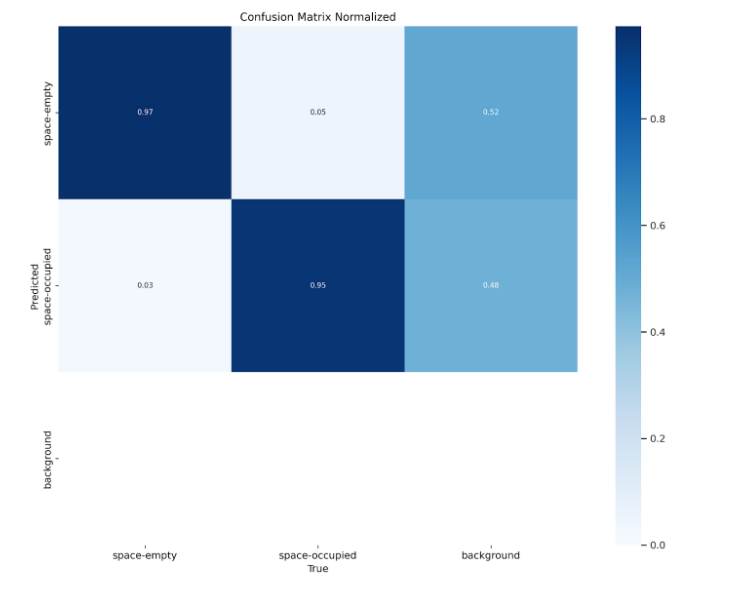

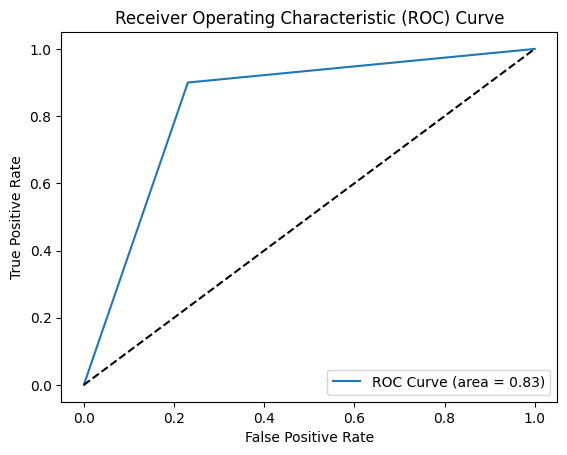

In [ ]:
fpr, tpr, _ = roc_curve(ground_truth, results)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

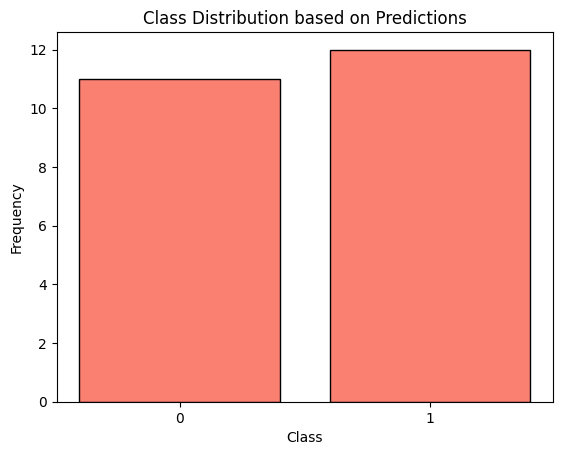

In [ ]:
class_counts = np.bincount(results)
plt.figure()
plt.bar(range(len(class_counts)), class_counts, color='salmon', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution based on Predictions')
plt.xticks(range(len(class_counts)))
plt.show()

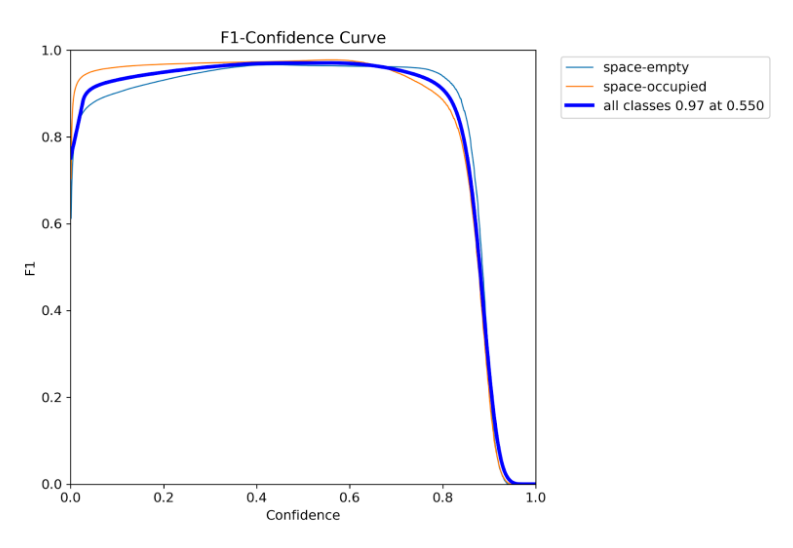

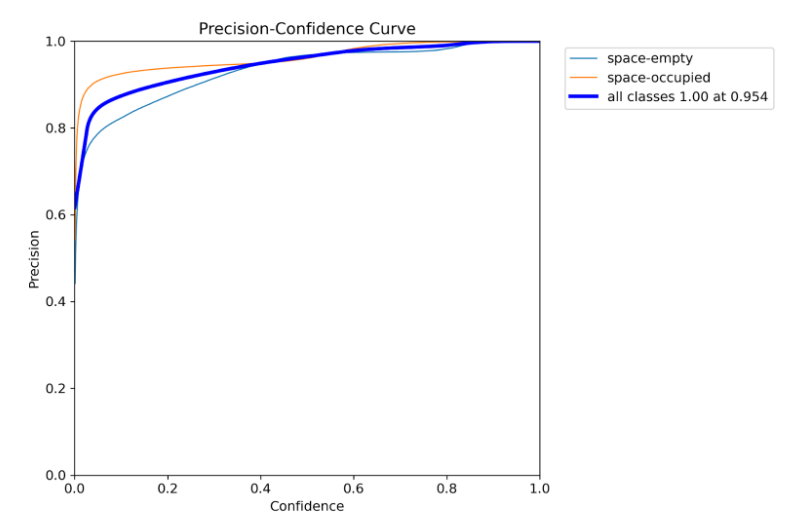

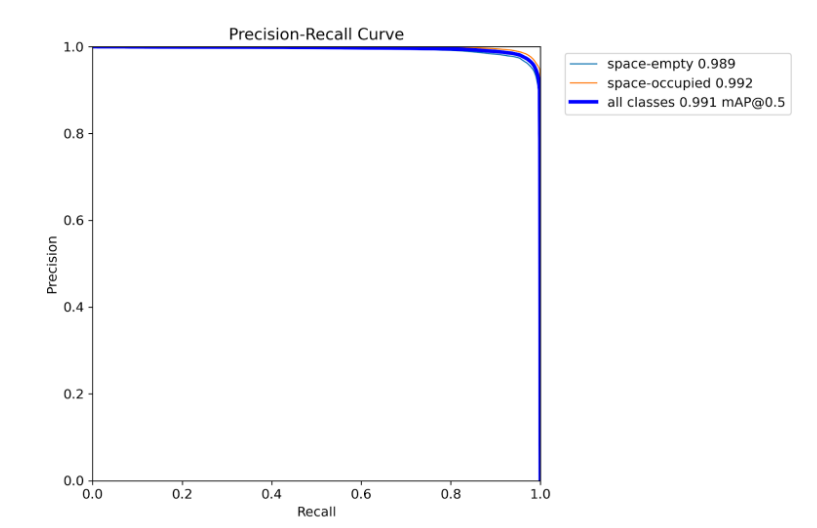

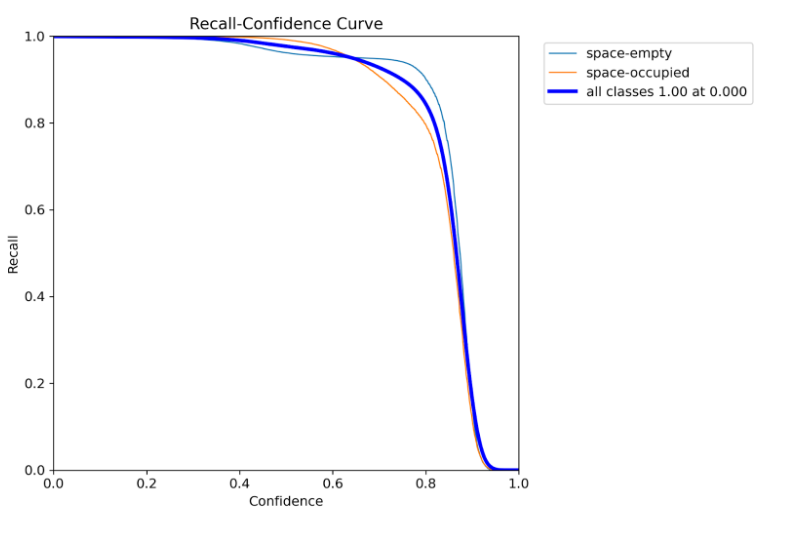